# Data generating functions from drawing data
This post will explore creating a data generating function from drawing data.

We draw some random looking function and collect data points using `https://drawdata.xyz/`

Start by importing stuff:

In [1]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")


Let's generate some data.

We use `https://drawdata.xyz/` to draw a line of our choice.

Here's a line I created earlier:
```
x,y,z
20,267,a
21,267,a
24,267,a
29,267,a
35,267,a
41,267,a
47,267,a
53,267,a
59,267,a
64,267,a
70,268,a
75,270,a
80,273,a
85,276,a
90,280,a
94,284,a
98,287,a
101,291,a
104,295,a
107,299,a
110,303,a
113,307,a
116,311,a
118,314,a
121,319,a
124,323,a
127,328,a
129,333,a
132,338,a
135,343,a
138,348,a
141,352,a
145,356,a
149,359,a
153,362,a
158,365,a
163,369,a
168,372,a
175,375,a
181,378,a
190,381,a
199,384,a
209,386,a
218,388,a
228,390,a
237,392,a
245,393,a
255,393,a
264,394,a
272,394,a
281,394,a
289,394,a
296,393,a
303,392,a
309,390,a
316,388,a
321,386,a
326,383,a
331,380,a
335,377,a
339,374,a
344,370,a
348,364,a
351,359,a
355,353,a
358,348,a
361,342,a
364,337,a
367,332,a
369,327,a
371,321,a
373,314,a
375,307,a
377,300,a
379,292,a
381,283,a
382,277,a
384,270,a
386,264,a
387,258,a
389,252,a
390,245,a
392,238,a
393,231,a
395,224,a
396,217,a
398,209,a
400,201,a
403,193,a
405,186,a
407,180,a
410,175,a
413,171,a
416,167,a
420,163,a
424,158,a
429,154,a
433,149,a
438,145,a
443,142,a
448,139,a
454,136,a
459,133,a
465,131,a
470,129,a
476,126,a
481,124,a
487,122,a
494,120,a
500,119,a
506,118,a
511,118,a
516,118,a
522,118,a
526,119,a
531,121,a
535,122,a
540,123,a
544,124,a
549,126,a
553,127,a
558,128,a
563,129,a
568,130,a
572,132,a
577,134,a
581,135,a
584,136,a
587,137,a
590,137,a
591,137,a
592,137,a
```

We can then copy to csv and use pandas to create a dataframe from the clipboard:

```
df = pd.read_clipboard(sep=',')
df
```

In [2]:
import io

data = """x,y,z
20,267,a
21,267,a
24,267,a
29,267,a
35,267,a
41,267,a
47,267,a
53,267,a
59,267,a
64,267,a
70,268,a
75,270,a
80,273,a
85,276,a
90,280,a
94,284,a
98,287,a
101,291,a
104,295,a
107,299,a
110,303,a
113,307,a
116,311,a
118,314,a
121,319,a
124,323,a
127,328,a
129,333,a
132,338,a
135,343,a
138,348,a
141,352,a
145,356,a
149,359,a
153,362,a
158,365,a
163,369,a
168,372,a
175,375,a
181,378,a
190,381,a
199,384,a
209,386,a
218,388,a
228,390,a
237,392,a
245,393,a
255,393,a
264,394,a
272,394,a
281,394,a
289,394,a
296,393,a
303,392,a
309,390,a
316,388,a
321,386,a
326,383,a
331,380,a
335,377,a
339,374,a
344,370,a
348,364,a
351,359,a
355,353,a
358,348,a
361,342,a
364,337,a
367,332,a
369,327,a
371,321,a
373,314,a
375,307,a
377,300,a
379,292,a
381,283,a
382,277,a
384,270,a
386,264,a
387,258,a
389,252,a
390,245,a
392,238,a
393,231,a
395,224,a
396,217,a
398,209,a
400,201,a
403,193,a
405,186,a
407,180,a
410,175,a
413,171,a
416,167,a
420,163,a
424,158,a
429,154,a
433,149,a
438,145,a
443,142,a
448,139,a
454,136,a
459,133,a
465,131,a
470,129,a
476,126,a
481,124,a
487,122,a
494,120,a
500,119,a
506,118,a
511,118,a
516,118,a
522,118,a
526,119,a
531,121,a
535,122,a
540,123,a
544,124,a
549,126,a
553,127,a
558,128,a
563,129,a
568,130,a
572,132,a
577,134,a
581,135,a
584,136,a
587,137,a
590,137,a
591,137,a
592,137,a
"""


df = pd.read_csv(io.StringIO(data))


/var/folders/_v/nlh4h1yx2n1gd6f3szjlgxt40000gr/T/ipykernel_26588/1701487723.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


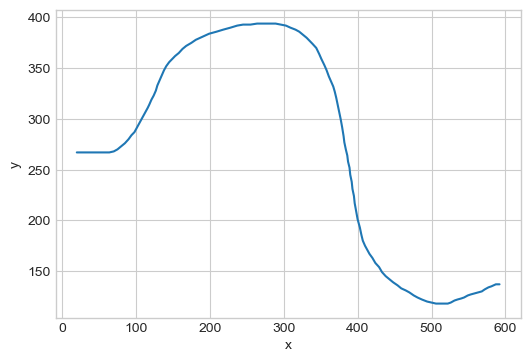

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(data=df, x="x", y="y", ax=ax)
fig.show()


## Summarising data

We need to summarise the line to be able to generate data points from it.
One flexible convenient way is to use cubic splines.

### Cubic splines

The standard scipy implementation fits a new spline to each new data point so we get a very close fit, but a complex function.

In [4]:
import scipy.interpolate

splines = scipy.interpolate.CubicSpline(x=df["x"], y=df["y"])


To see how well over function has been learnt we can plot it again:

/var/folders/_v/nlh4h1yx2n1gd6f3szjlgxt40000gr/T/ipykernel_26588/3555637029.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


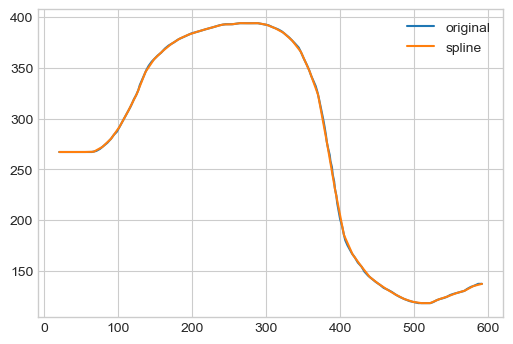

In [5]:
import numpy as np

x_est = np.linspace(df["x"].min(), df["x"].max())
y_est = splines(x_est)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(df["x"], df["y"], label="original")
ax.plot(x_est, y_est, label="spline")
ax.legend()
fig.show()


Beware if we try to extrapolate cubic splines will not be appropriate as they will quickly point up or down.
Here we extend the max range by 10% and see very odd looking results.

/var/folders/_v/nlh4h1yx2n1gd6f3szjlgxt40000gr/T/ipykernel_26588/2547315597.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


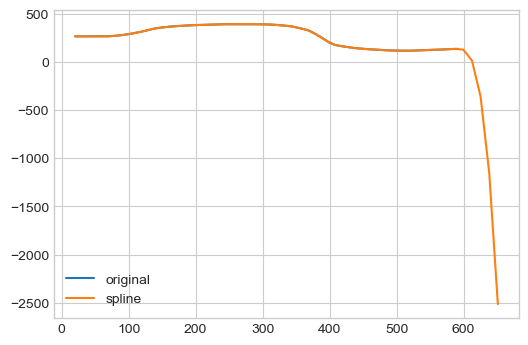

In [6]:
x_est_extra = np.linspace(df["x"].min(), df["x"].max() * 1.1)
y_est = splines(x_est_extra)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(df["x"], df["y"], label="original")
ax.plot(x_est_extra, y_est, label="spline")
ax.legend()
fig.show()


We can plot the spline derivatives which show this is rather too complex a representation.

/var/folders/_v/nlh4h1yx2n1gd6f3szjlgxt40000gr/T/ipykernel_26588/4198977419.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


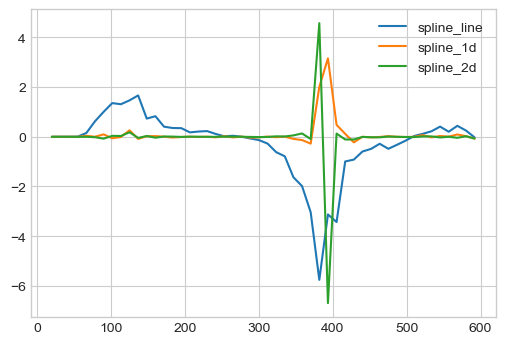

In [7]:
x_est = np.linspace(df["x"].min(), df["x"].max())
y_est = splines(x_est)

fig, ax = plt.subplots(figsize=(6, 4))
# ax.plot(x_est, y_est, label='spline')
ax.plot(x_est, splines(x_est, 1), label="spline_line")
ax.plot(x_est, splines(x_est, 2), label="spline_1d")
ax.plot(x_est, splines(x_est, 3), label="spline_2d")
ax.legend()
fig.show()


The scipy implementation creates a spline between each point.
If we subsample the data points we can get a smoother representation.

Here we uniformly sample, but there are likely better ways to distribute the knots to reduce overall error to the original dataset.

/var/folders/_v/nlh4h1yx2n1gd6f3szjlgxt40000gr/T/ipykernel_26588/453723476.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


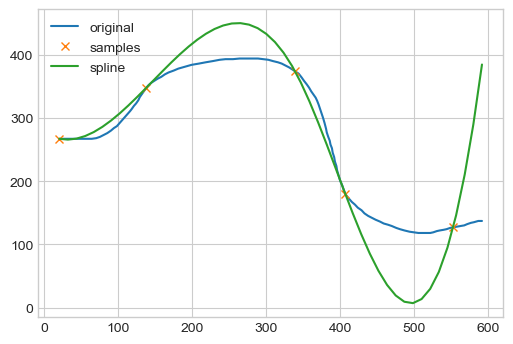

In [8]:
samp_rate = 30

splines = scipy.interpolate.CubicSpline(
    x=df["x"][0::samp_rate], y=df["y"][0::samp_rate]
)

y_est = splines(x_est)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(df["x"], df["y"], label="original")
ax.plot(
    df["x"][0::samp_rate],
    df["y"][0::samp_rate],
    marker="x",
    linestyle="",
    label="samples",
)
ax.plot(x_est, y_est, label="spline")
ax.legend()
fig.show()


/var/folders/_v/nlh4h1yx2n1gd6f3szjlgxt40000gr/T/ipykernel_26588/4243488250.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


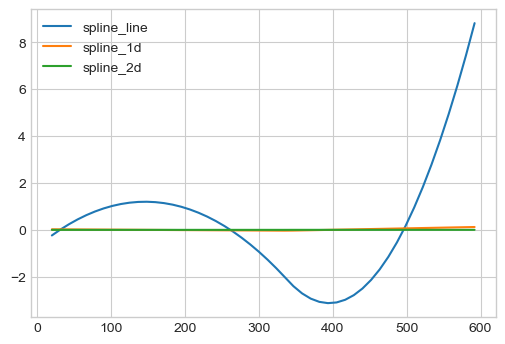

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x_est, splines(x_est, 1), label="spline_line")
ax.plot(x_est, splines(x_est, 2), label="spline_1d")
ax.plot(x_est, splines(x_est, 3), label="spline_2d")
ax.legend()
fig.show()


We can use B-Splines in scipy which gives us knot allocation as well. We control a smoothness parameter which controls how many knots are used and their placement.

/var/folders/_v/nlh4h1yx2n1gd6f3szjlgxt40000gr/T/ipykernel_26588/1178800980.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(array([ 20.,  20.,  20.,  20., 149., 361., 393., 410., 443., 592., 592.,
        592., 592.]),
 array([266.57874368, 251.24793662, 387.89628971, 464.64881606,
        270.68803167, 151.10293172, 115.82479818, 113.7866661 ,
        139.4434958 ,   0.        ,   0.        ,   0.        ,
          0.        ]),
 3)

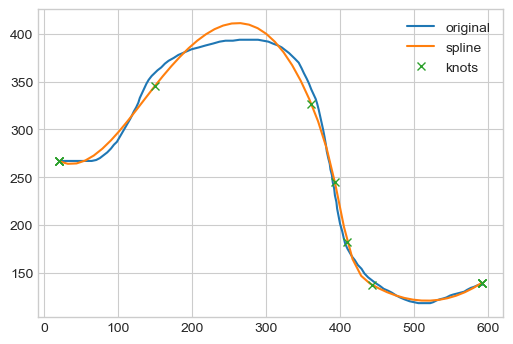

In [10]:
splines = scipy.interpolate.splrep(x=df["x"], y=df["y"], s=10000)
y_est = scipy.interpolate.splev(x_est, splines)
y_knots = scipy.interpolate.splev(splines[0], splines)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(df["x"], df["y"], label="original")
ax.plot(x_est, y_est, label="spline")
ax.plot(splines[0], y_knots, marker="x", linestyle="", label="knots")
ax.legend()
fig.show()

splines


The data is now condensed into a small number of parameters.

We can abstract all the above into a simple function that reads from the clipboard and generates a B-Splines object:

/var/folders/_v/nlh4h1yx2n1gd6f3szjlgxt40000gr/T/ipykernel_22298/3230242958.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


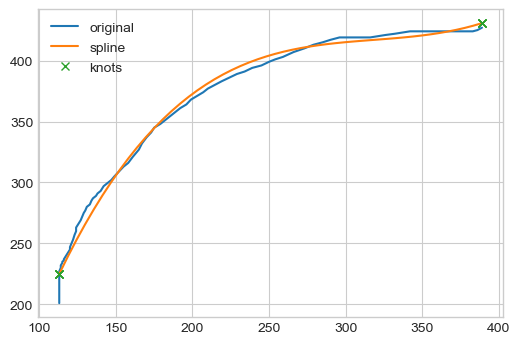

In [4]:
import scipy.interpolate
import numpy as np

def smooth_spline_from_clipboard(s=10_000, plot: bool = False):
    df = pd.read_clipboard(sep=",")

    if s is None:
        splines_params = scipy.interpolate.splrep(x=df["x"], y=df["y"])
    else:
        splines_params = scipy.interpolate.splrep(x=df["x"], y=df["y"], s=s)
    splines = scipy.interpolate.BSpline(*splines_params, extrapolate=False)

    if not plot:
        return df, splines

    x_est = np.linspace(df["x"].min(), df["x"].max())
    y_est = splines(x_est)
    y_knots = splines(splines_params[0])

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(df["x"], df["y"], label="original")
    ax.plot(x_est, y_est, label="spline")
    ax.plot(splines_params[0], y_knots, marker="x", linestyle="", label="knots")
    ax.legend()
    fig.show()

    return df, splines


df, splines = smooth_spline_from_clipboard(plot=True)


In [6]:
splines.tck


(array([113., 113., 113., 113., 389., 389., 389., 389.]),
 array([224.93053175, 465.45977346, 394.56839914, 430.7190121 ,
          0.        ,   0.        ,   0.        ,   0.        ]),
 3)

Persist splines for loading

In [12]:
import pickle
import io

splines_io = io.BytesIO(pickle.dumps(splines))
splines_loaded = pickle.load(splines_io)
y_est = splines_loaded(np.linspace(0, 1000))
y_est


array([         nan,          nan, 306.04218256, 321.65634248,
       329.72599665, 331.14377902, 326.80232351, 317.59426407,
       304.41223461, 288.14886909, 269.76777584, 250.53042248,
       231.77640175, 214.8453067 , 200.89596761, 190.00857411,
       181.86490973, 176.14612226, 172.5333595 , 170.70776925,
       170.3504993 , 171.14269745, 172.76551149, 174.90008922,
       177.22757845,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan])

### Signal processing techniques

We can also use:
* truncated Fourier series
* truncated discrete cosine transform
* wavelets


#### Linear interpolation
We need to have uniform sampled data points.
We can use linear/sinc interpolation for this.

/var/folders/_v/nlh4h1yx2n1gd6f3szjlgxt40000gr/T/ipykernel_26588/151921116.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


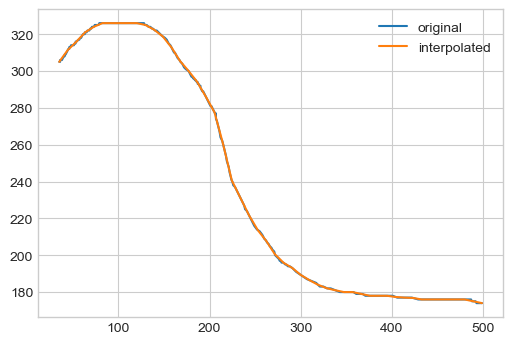

In [13]:
import scipy.interpolate

x_interpolater = scipy.interpolate.interp1d(x=df["x"], y=df["y"])
x_int = np.linspace(df["x"].min(), df["x"].max())
y_int = x_interpolater(x_int)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(df["x"], df["y"], label="original")
ax.plot(x_int, y_int, label="interpolated")
ax.legend()
fig.show()


#### FFT
Approximate with FFT

/var/folders/_v/nlh4h1yx2n1gd6f3szjlgxt40000gr/T/ipykernel_26588/1444341180.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


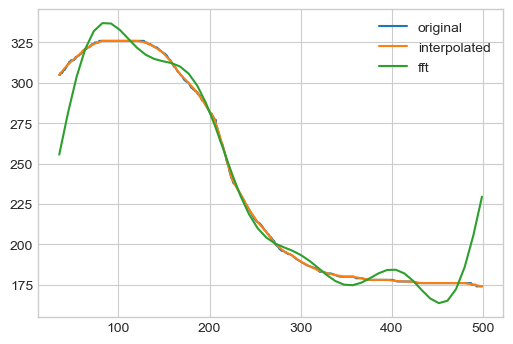

In [14]:
import scipy.fft

fft = scipy.fft.fft(y_int)

if 1:
    # truncate fft
    fft_filt = fft
    fft_filt[np.abs(fft) < 300] = 0
else:
    # low pass
    fft_filt = fft
    fft_filt[len(fft) // 2 :] = 0

y_fft = np.abs(scipy.fft.ifft(fft_filt))

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(df["x"], df["y"], label="original")
ax.plot(x_int, y_int, label="interpolated")
ax.plot(x_int, y_fft, label="fft")
ax.legend()
fig.show()


#### DCT
Approximate with DCT

/var/folders/_v/nlh4h1yx2n1gd6f3szjlgxt40000gr/T/ipykernel_26588/3685423727.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


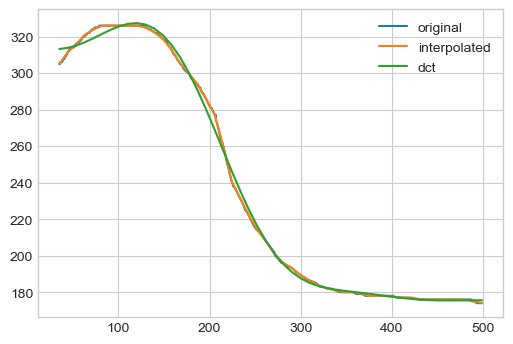

In [15]:
import scipy.fft

dct = scipy.fft.dct(y_int)

if 0:
    # truncate dct
    dct_filt = dct
    dct_filt[np.abs(dct) < 300] = 0
else:
    # low pass
    dct_filt = dct
    dct_filt[8:] = 0

y_dct = np.abs(scipy.fft.idct(dct_filt))

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(df["x"], df["y"], label="original")
ax.plot(x_int, y_int, label="interpolated")
ax.plot(x_int, y_dct, label="dct")
ax.legend()
fig.show()
